In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import io
%cd "C:\Users\KESIRAJU TEJASWINI\Documents\"

C:\Users\KESIRAJU TEJASWINI\Documents


In [3]:
df =pd.read_excel("MLdata.xlsx")

In [4]:
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL',
       'CORE-STBL.1', 'CORE-STBL.2', 'decision-ADM-DECS'],
      dtype='object')

In [37]:
df.shape

(90, 9)

In [38]:
X.shape

(90, 11)

In [6]:
!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 213.9 kB/s eta 0:00:00


In [7]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
X= df.drop(['decision-ADM-DECS'],axis=1)
y = df['decision-ADM-DECS']

In [12]:
X = pd.get_dummies(X, drop_first = True)

In [13]:
y = pd.get_dummies(y, drop_first = True)

In [14]:
#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
Xtrain.shape

(63, 11)

In [40]:
Xtest.shape

(27, 11)

In [43]:
X.tail()

,CORE-STBL.2,L-CORE_low,L-CORE_mid,L-SURF_low,L-SURF_mid,L-O2_good,L-BP_mid,SURF-STBL_unstable,CORE-STBL_unstable,CORE-STBL.1_stable,CORE-STBL.1_unstable
85,10,0,1,0,1,0,1,1,0,1,0
86,15,0,1,0,1,0,1,1,0,1,0
87,15,0,1,0,1,1,1,1,0,1,0
88,10,0,1,0,1,0,1,1,0,1,0
89,15,0,1,0,1,1,1,1,0,1,0


In [15]:
#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

In [41]:
Xtrain.columns

Index(['CORE-STBL.2', 'L-CORE_low', 'L-CORE_mid', 'L-SURF_low', 'L-SURF_mid',
       'L-O2_good', 'L-BP_mid', 'SURF-STBL_unstable', 'CORE-STBL_unstable',
       'CORE-STBL.1_stable', 'CORE-STBL.1_unstable'],
      dtype='object')

In [42]:
Xtest.columns

Index(['CORE-STBL.2', 'L-CORE_low', 'L-CORE_mid', 'L-SURF_low', 'L-SURF_mid',
       'L-O2_good', 'L-BP_mid', 'SURF-STBL_unstable', 'CORE-STBL_unstable',
       'CORE-STBL.1_stable', 'CORE-STBL.1_unstable'],
      dtype='object')

In [31]:
from sklearn.tree import export_graphviz
import graphviz

In [16]:
DTR_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
DTR_clf.fit(Xt, Yt)

DecisionTreeClassifier()

[Text(0.5375, 0.9545454545454546, 'X[6] <= 0.5\ngini = 0.448\nsamples = 56\nvalue = [37, 19]'),
 Text(0.2833333333333333, 0.8636363636363636, 'X[3] <= 0.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.16666666666666666, 0.7727272727272727, 'X[7] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.1, 0.6818181818181818, 'X[4] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.06666666666666667, 0.5909090909090909, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13333333333333333, 0.5909090909090909, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.23333333333333334, 0.6818181818181818, 'X[10] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.5909090909090909, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),

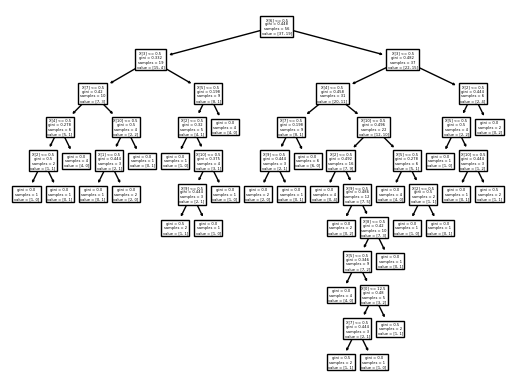

In [32]:
tree.plot_tree(DTR_clf)
plt.figsize()

In [36]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(DTR_clf, out_file=None, 
                feature_names= X,  
                class_names= y,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graphviz.Source(dot_data)  

# Set the size of the output image
graph.format = 'png'
graph.engine = 'dot'
graph.attr('graph', dpi='300')

# Render the decision tree
graph.render("DTR_clf", view=True)

ValueError: Length of feature_names, 90 does not match number of features, 11

In [33]:
#Visualizing Decision Tree using graphviz library
plot_data = tree.export_graphviz(DTR_clf, out_file=None)
graph = graphviz.Source(plot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [20]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

print('Accuracy score is:',cross_val_score(DTR_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.48245614035087714


In [21]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = DTR_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.14285714285714285


array([[[0, 2],
        [4, 1]],

       [[1, 4],
        [2, 0]]], dtype=int64)

In [22]:
#Checking our model performance on actual unseen test data.. 
YT_hat = DTR_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 44.44444444444444 %


array([[[ 0,  3],
        [12, 12]],

       [[12, 12],
        [ 3,  0]]], dtype=int64)

[Text(0.4724264705882353, 0.9545454545454546, 'X[6] <= 0.5\ngini = 0.444\nsamples = 63\nvalue = [42, 21]'),
 Text(0.23529411764705882, 0.8636363636363636, 'X[0] <= 12.5\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.17647058823529413, 0.7727272727272727, 'X[5] <= 0.5\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.14705882352941177, 0.6818181818181818, 'X[2] <= 0.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.058823529411764705, 0.5909090909090909, 'X[7] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.029411764705882353, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.08823529411764706, 0.5, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.058823529411764705, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11764705882352941, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23529411764705882, 0.5909090909090909, 'X[7] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text

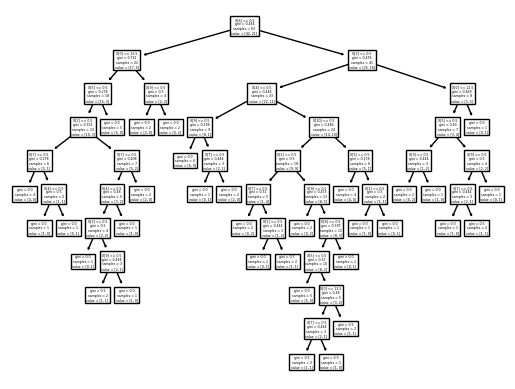

In [23]:
#Training model on Actual train data
DTR_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
DTR_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
tree.plot_tree(DTR_Fclf)

In [24]:
#Final Decision tree build for deploying in real world cases....

DTR_data = tree.export_graphviz(DTR_Fclf, out_file=None)
graph = graphviz.Source(DTR_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [26]:
#Checking the performance of model on Actual Test data...

YT_Fhat = DTR_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 59.25925925925925 %


array([[[ 0,  3],
        [ 8, 16]],

       [[16,  8],
        [ 3,  0]]], dtype=int64)